In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:/Users/karunya/Documents/Guvi projects/Agricultural Analysis Project/Rice_data.csv"  
df_rice = pd.read_csv("C:/Users/karunya/Documents/Guvi projects/Agricultural Analysis Project/Rice_data.csv")
print(df_rice.columns)

Index(['state_code', 'state_name', 'dist_code', 'dist_name', 'year',
       'rice_area', 'rice_production', 'rice_yield'],
      dtype='object')


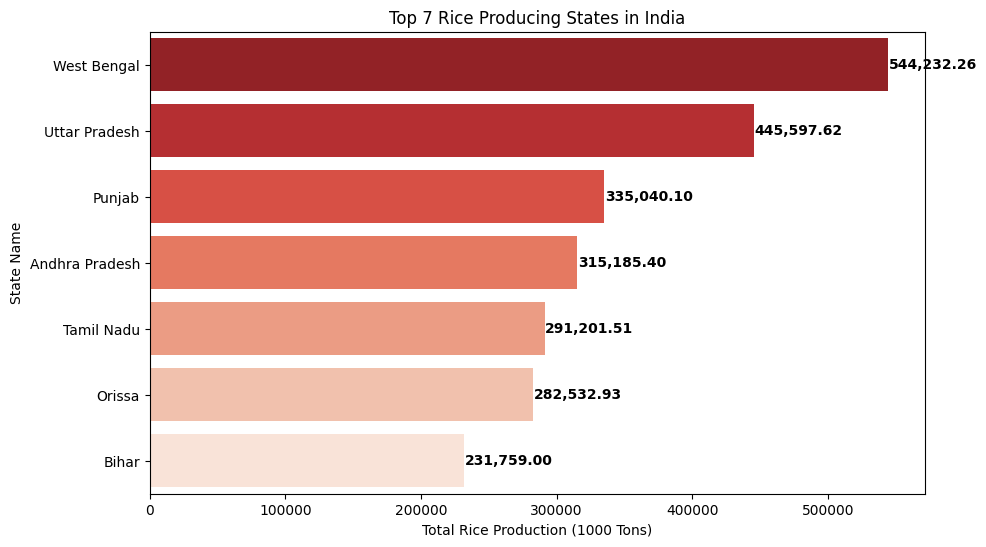

In [13]:
#1 Top 7 RICE PRODUCTION State Data(Bar_plot)
top_rice_states = df_rice.groupby("state_name")["rice_production"].sum().reset_index()
top_rice_states = top_rice_states.sort_values(by="rice_production", ascending=False).head(7)

plt.figure(figsize=(10, 6))
ax=sns.barplot(x="rice_production", y="state_name", data=top_rice_states, hue="state_name", legend=False, palette="Reds_r")
for i, value in enumerate(top_rice_states["rice_production"]):
    ax.text(value + 500, i, f"{value:,.2f}", va='center', fontsize=10, fontweight='bold', color='black')
plt.xlabel("Total Rice Production (1000 Tons)")
plt.ylabel("State Name")
plt.title("Top 7 Rice Producing States in India")
plt.show()

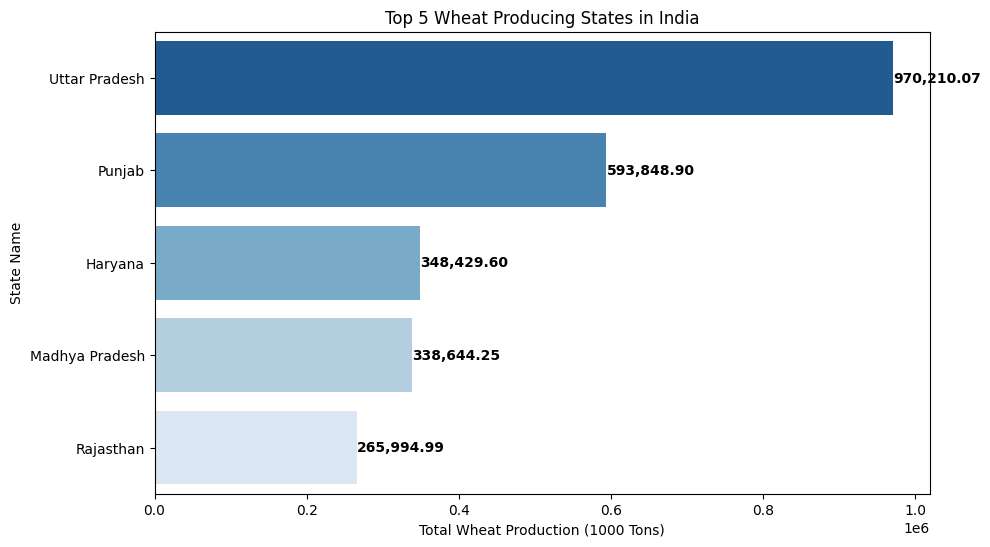

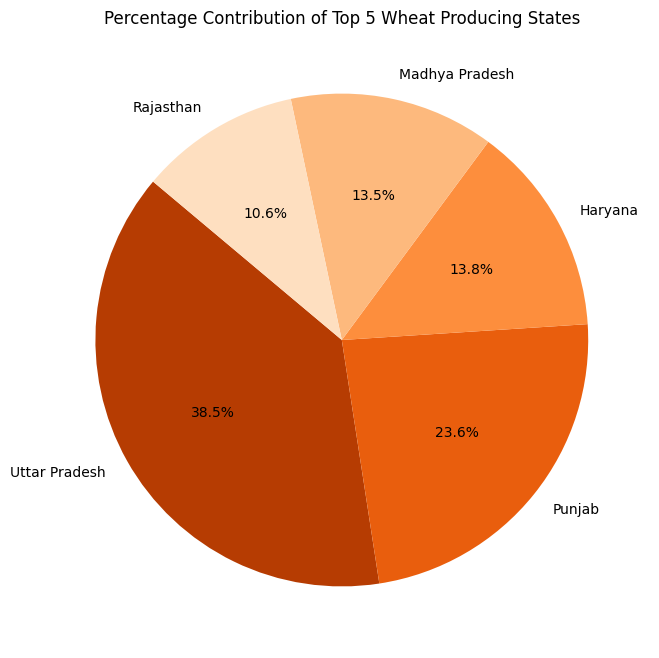

In [14]:
#2 Top 5 Wheat Producing States Data(Bar_chart)and its percentage(%)(Pie_chart)
df_wheat = pd.read_csv("C:/Users/karunya/Documents/Guvi projects/Agricultural Analysis Project/WHeat_data.csv")
top_wheat_states = df_wheat.groupby("state_name")["wheat_production"].sum().reset_index()
top_wheat_states = top_wheat_states.sort_values(by="wheat_production", ascending=False).head(5)

#BAR CHART
plt.figure(figsize=(10, 6))
ax=sns.barplot(x="wheat_production", y="state_name", data=top_wheat_states, hue="state_name", palette="Blues_r", legend=False)
for i, value in enumerate(top_wheat_states["wheat_production"]):
    ax.text(value + 500, i, f"{value:,.2f}", va='center', fontsize=10, fontweight='bold', color='black')
plt.xlabel("Total Wheat Production (1000 Tons)")
plt.ylabel("State Name")
plt.title("Top 5 Wheat Producing States in India")
plt.show()

# PIE CHART 
plt.figure(figsize=(8, 8))
plt.pie(top_wheat_states["wheat_production"], labels=top_wheat_states["state_name"], autopct="%1.1f%%", colors=sns.color_palette("Oranges_r", 5), startangle=140)
plt.title("Percentage Contribution of Top 5 Wheat Producing States")
plt.show()


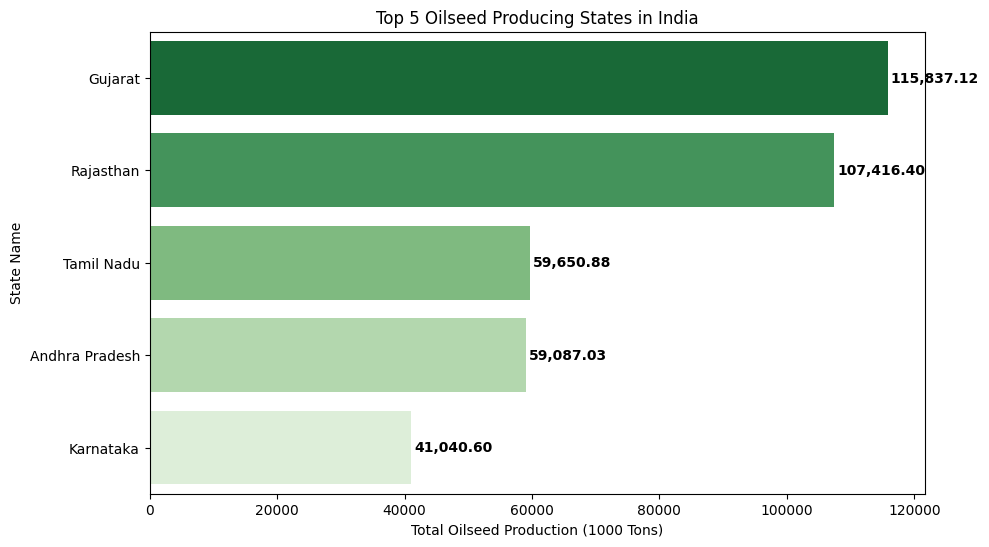

In [15]:

#3 Oil seed production by top 5 states
df_oilseed = pd.read_csv("C:/Users/karunya/Documents/Guvi projects/Agricultural Analysis Project/Other_Crops_data.csv")
# Group by state and sum the total oilseed production
oilseed_columns = [
    "groundnut_production",
    "sesamum_production",
    "rapeseed_and_mustard_production",
    "safflower_production"
]

# Summing oilseed production for each state
top_oilseed_states = df_oilseed.groupby("state_name")[oilseed_columns].sum().reset_index()

# Create a total oilseed production column
top_oilseed_states["total_oilseed_production"] = top_oilseed_states[oilseed_columns].sum(axis=1)

top_oilseed_states = top_oilseed_states.sort_values(by="total_oilseed_production", ascending=False).head(5)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="total_oilseed_production", y="state_name", data=top_oilseed_states, hue="state_name", legend=False, palette="Greens_r")

for i, value in enumerate(top_oilseed_states["total_oilseed_production"]):
    ax.text(value + 500, i, f"{value:,.2f}", va='center', fontsize=10, fontweight='bold', color='black')

plt.xlabel("Total Oilseed Production (1000 Tons)")
plt.ylabel("State Name")
plt.title("Top 5 Oilseed Producing States in India")
plt.show()


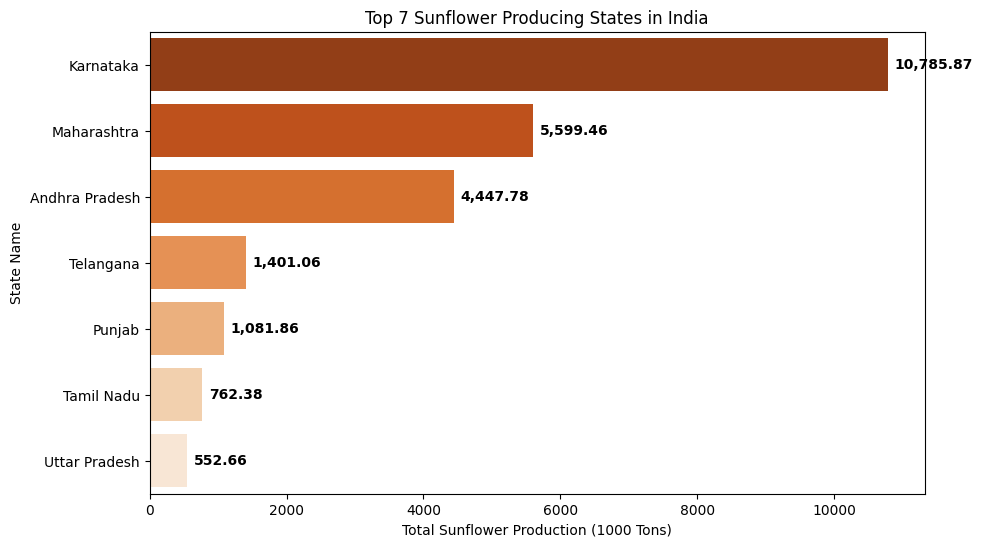

In [16]:
#4 Top 7 SUNFLOWER PRODUCTION  State
import pandas as pd

df_sunflower = pd.read_csv("C:/Users/karunya/Documents/Guvi projects/Agricultural Analysis Project/Other_Crops_data.csv")
sunflower_col = "sunflower_production"
top_sunflower_states = df_sunflower.groupby("state_name")[sunflower_col].sum().reset_index()

# Get the top 7 states with the highest sunflower production
top_sunflower_states = top_sunflower_states.sort_values(by=sunflower_col, ascending=False).head(7)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sunflower_col, y="state_name", data=top_sunflower_states, hue="state_name", legend=False, palette="Oranges_r")

for i, value in enumerate(top_sunflower_states[sunflower_col]):
    ax.text(value + 100, i, f"{value:,.2f}", va='center', fontsize=10, fontweight='bold', color='black')

plt.xlabel("Total Sunflower Production (1000 Tons)")
plt.ylabel("State Name")
plt.title("Top 7 Sunflower Producing States in India")
plt.show()

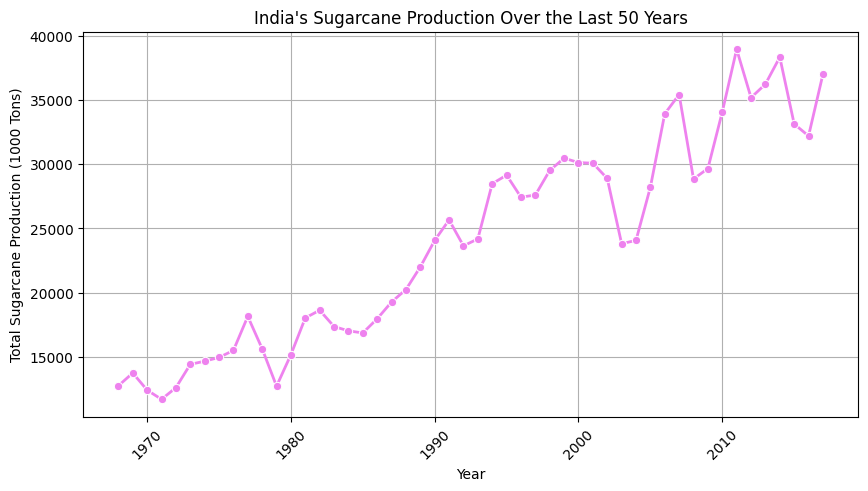

In [17]:
#5 India's SUGARCANE PRODUCTION From Last 50 Years(Line_plot)
df_sugarcane = pd.read_csv("C:/Users/karunya/Documents/Guvi projects/Agricultural Analysis Project/Other_Crops_data.csv")
year_col = "year" 
sugarcane_col = "sugarcane_production"

sugarcane_production = df_sugarcane.groupby(year_col)[sugarcane_col].sum().reset_index()

# Filter data for the last 50 years
sugarcane_production = sugarcane_production.sort_values(by=year_col, ascending=True).tail(50)

plt.figure(figsize=(10, 5))
sns.lineplot(x=year_col, y=sugarcane_col, data=sugarcane_production, marker="o", linewidth=2, color="Violet")

plt.xlabel("Year")
plt.ylabel("Total Sugarcane Production (1000 Tons)")
plt.title("India's Sugarcane Production Over the Last 50 Years")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

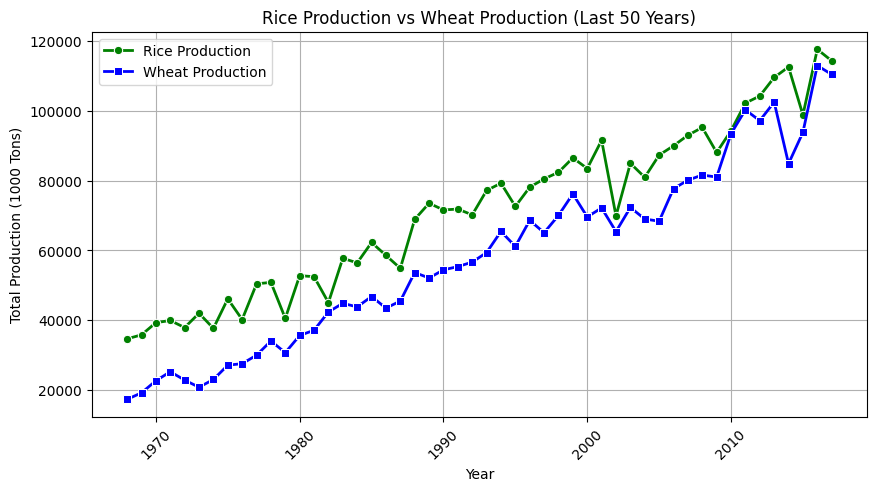

In [18]:
#6 Rice Production Vs Wheat Production (Last 50y)
df_rice = pd.read_csv("C:/Users/karunya/Documents/Guvi projects/Agricultural Analysis Project/Rice_data.csv")
df_wheat = pd.read_csv("C:/Users/karunya/Documents/Guvi projects/Agricultural Analysis Project/Wheat_data.csv")

year_col = "year" 
rice_col = "rice_production"  
wheat_col = "wheat_production" 

df_rice_grouped = df_rice.groupby(year_col)[rice_col].sum().reset_index()
df_wheat_grouped = df_wheat.groupby(year_col)[wheat_col].sum().reset_index()


df_combined = pd.merge(df_rice_grouped, df_wheat_grouped, on=year_col, how="inner")


df_combined = df_combined.sort_values(by=year_col, ascending=True).tail(50)

plt.figure(figsize=(10, 5))

sns.lineplot(x=year_col, y=rice_col, data=df_combined, marker="o", linewidth=2, color="green", label="Rice Production")

sns.lineplot(x=year_col, y=wheat_col, data=df_combined, marker="s", linewidth=2, color="blue", label="Wheat Production")

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Total Production (1000 Tons)")
plt.title("Rice Production vs Wheat Production (Last 50 Years)")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()


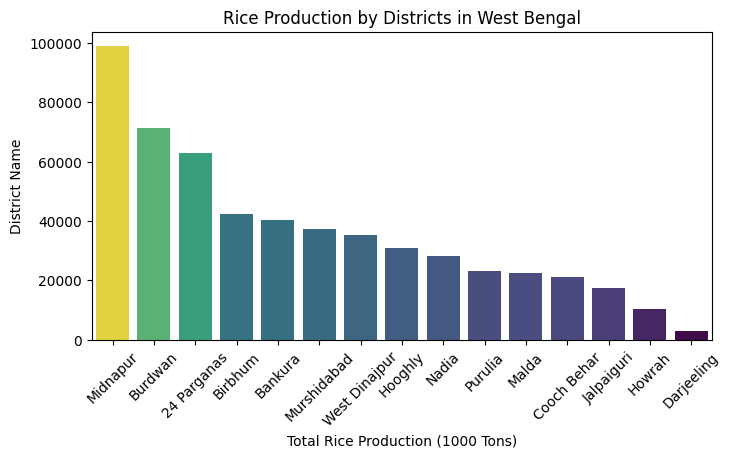

In [19]:
#7 Rice Production By West Bengal Districts
df_rice = pd.read_csv("C:/Users/karunya/Documents/Guvi projects/Agricultural Analysis Project/Rice_data.csv")
state_col = "state_name"  
district_col = "dist_name" 
rice_col = "rice_production"

df_wb = df_rice[df_rice[state_col] == "West Bengal"]

wb_rice_production = df_wb.groupby(district_col)[rice_col].sum().reset_index()

wb_rice_production = wb_rice_production.sort_values(by=rice_col, ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=district_col, y=rice_col, data=wb_rice_production, hue=rice_col, palette="viridis", legend=False)
plt.xticks(rotation=45)
plt.xlabel("Total Rice Production (1000 Tons)")
plt.ylabel("District Name")
plt.title("Rice Production by Districts in West Bengal")
plt.show()

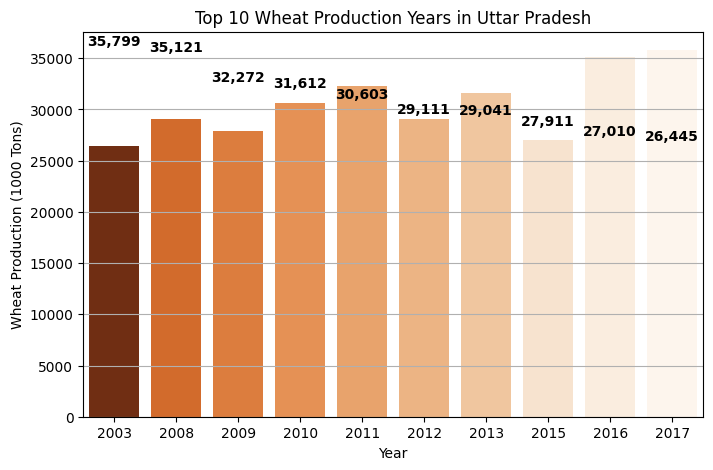

In [20]:
#8 Top 10 Wheat Production Years From UP
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_wheat = pd.read_csv("C:/Users/karunya/Documents/Guvi projects/Agricultural Analysis Project/Wheat_data.csv")
state_col = "state_name" 
year_col = "year" 
wheat_col = "wheat_production" 

df_up_wheat = df_wheat[df_wheat[state_col] == "Uttar Pradesh"]

top_wheat_years = df_up_wheat.groupby(year_col)[wheat_col].sum().reset_index()

top_wheat_years = top_wheat_years.sort_values(by=wheat_col, ascending=False).head(10)

plt.figure(figsize=(8, 5))
ax=sns.barplot(x=year_col, y=wheat_col, data=top_wheat_years, hue=year_col, palette="Oranges_r", legend=False)
for index, value in enumerate(top_wheat_years[wheat_col]):
    plt.text(index, value + 500, f"{value:,.0f}", ha='center', fontsize=10, fontweight='bold')

plt.xlabel("Year")
plt.ylabel("Wheat Production (1000 Tons)")
plt.title("Top 10 Wheat Production Years in Uttar Pradesh")
plt.grid(axis="y")

plt.show()


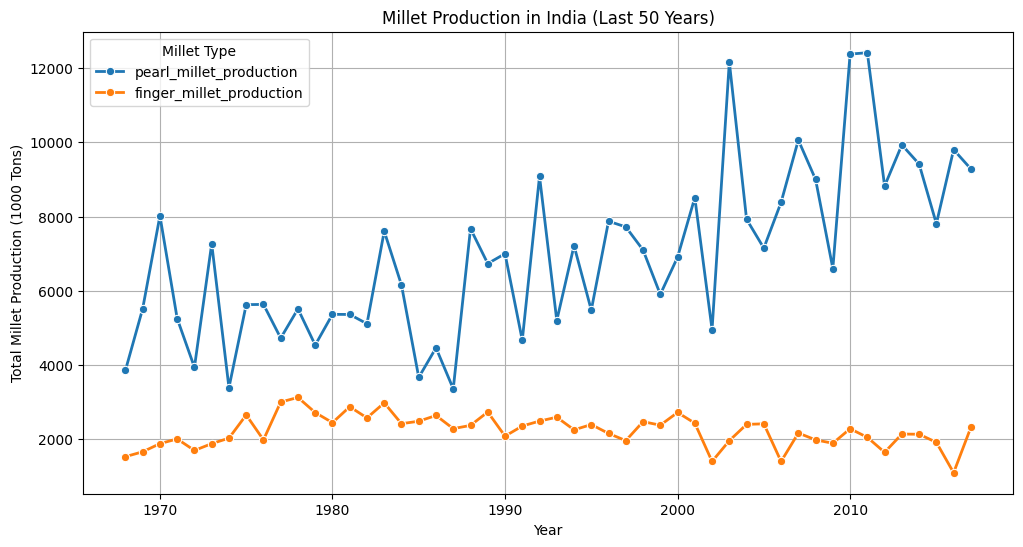

In [21]:
#9 Millet Production (Last 50y)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_millet = pd.read_csv("C:/Users/karunya/Documents/Guvi projects/Agricultural Analysis Project/Other_Crops_data.csv")
millet_cols = ["pearl_millet_production", "finger_millet_production"]
year_col = "year"
millet_production_50y = df_millet.groupby(year_col)[millet_cols].sum().reset_index()
millet_production_50y = millet_production_50y.sort_values(by=year_col).tail(50)
# Melt DataFrame to plot multiple lines
millet_production_50y = millet_production_50y.melt(id_vars=[year_col], 
                                                    value_vars=millet_cols, 
                                                    var_name="Millet Type", 
                                                    value_name="Production")

plt.figure(figsize=(12, 6))
sns.lineplot(x=year_col, y="Production", hue="Millet Type", data=millet_production_50y, marker="o", linewidth=2)
plt.xlabel("Year")
plt.ylabel("Total Millet Production (1000 Tons)")
plt.title("Millet Production in India (Last 50 Years)")
plt.legend(title="Millet Type")
plt.grid(True)
plt.show()


In [ ]:
!pip install geopandas matplotlib pandas contextily


In [30]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
df = pd.read_csv("C:/Users/karunya/Documents/Guvi projects/Agricultural Analysis Project/states_with_coordinates.csv")

# Check if 'latitude' and 'longitude' columns exist
if "latitude" not in df.columns or "longitude" not in df.columns:
    raise ValueError("CSV must contain 'latitude' and 'longitude' columns.")

# Create geometry points from latitude and longitude
df["geometry"] = df.apply(lambda row: Point(row["longitude"], row["latitude"]), axis=1)

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:4326")  # WGS 84 coordinate system

# Save as a Shapefile (.shp)
shp_file = "C:/Users/karunya/Documents/Guvi projects/Agricultural Analysis Project/states.shp"
gdf.to_file(shp_file, driver="ESRI Shapefile")

print(f"Shapefile saved at: {shp_file}")


Shapefile saved at: C:/Users/karunya/Documents/Guvi projects/Agricultural Analysis Project/states.shp


In [2]:
#10
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx  
india_map = gpd.read_file("C:/Users/karunya/Documents/Guvi projects/Agricultural Analysis Project/states.shp")
df_sorghum = pd.read_csv("C:/Users/karunya/Documents/Guvi projects/Agricultural Analysis Project/Other_Crops_data.csv")
df_sorghum["total_sorghum_production"] = df_sorghum["kharif_sorghum_production"] + df_sorghum["rabi_sorghum_production"]
sorghum_production = df_sorghum.groupby("state_name")["total_sorghum_production"].sum().reset_index()
india_map = india_map.merge(sorghum_production, on="state_name", how="left")

# Convert CRS to Web Mercator for basemap
india_map = india_map.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 8))
india_map.plot(column="total_sorghum_production", cmap="OrRd", linewidth=0.8, edgecolor="black",
               legend=True, ax=ax)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, attribution="© OpenStreetMap")
for idx, row in india_map.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y  # Get centroid of each state
    state_label = f"{row['state_name']}\n{row['total_sorghum_production']:.0f}"  # Format label
    ax.annotate(state_label, xy=(x, y), xytext=(3, 3), textcoords="offset points",
                fontsize=8, color="black", ha="center", bbox=dict(facecolor="white", alpha=0.5, edgecolor='black'))

ax.set_axis_off()
plt.title("Sorghum Production by State in India", fontsize=14, fontweight="bold")

plt.show()


DataSourceError: Unable to open C:/Users/karunya/Documents/Guvi projects/Agricultural Analysis Project/states.shx or C:/Users/karunya/Documents/Guvi projects/Agricultural Analysis Project/states.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

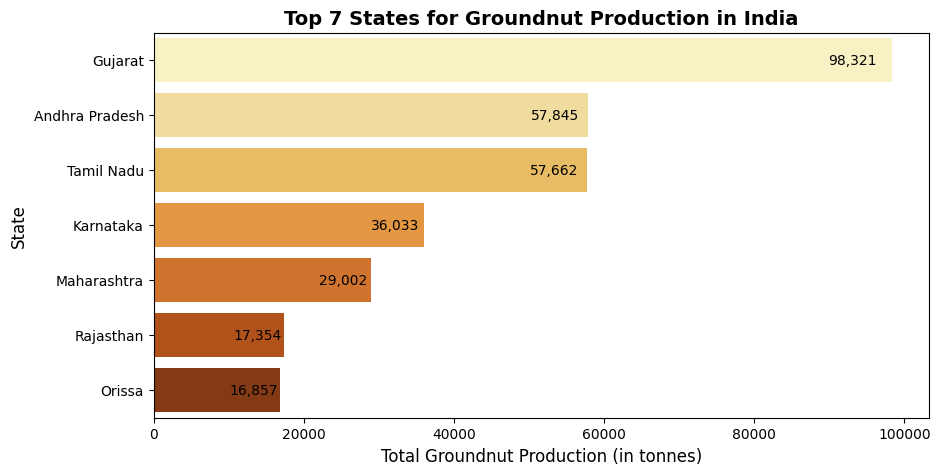

In [1]:
#11 Top 7 States for Groundnut Production
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:/Users/karunya/Documents/Guvi projects/Agricultural Analysis Project/Other_Crops_data.csv")
groundnut_production = df.groupby("state_name")["groundnut_production"].sum().reset_index()
top_7_states = groundnut_production.nlargest(7, "groundnut_production")
plt.figure(figsize=(10, 5))  # Reduced figure size
ax = sns.barplot(x="groundnut_production", y="state_name", hue="state_name", data=top_7_states, palette="YlOrBr", legend=False)
for index, value in enumerate(top_7_states["groundnut_production"]):
        ax.text(value * 0.98, index, f'{value:,.0f}', va='center', ha='right', fontsize=10, color='black')
plt.xlabel("Total Groundnut Production (in tonnes)", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.title("Top 7 States for Groundnut Production in India", fontsize=14, fontweight="bold")
plt.show()





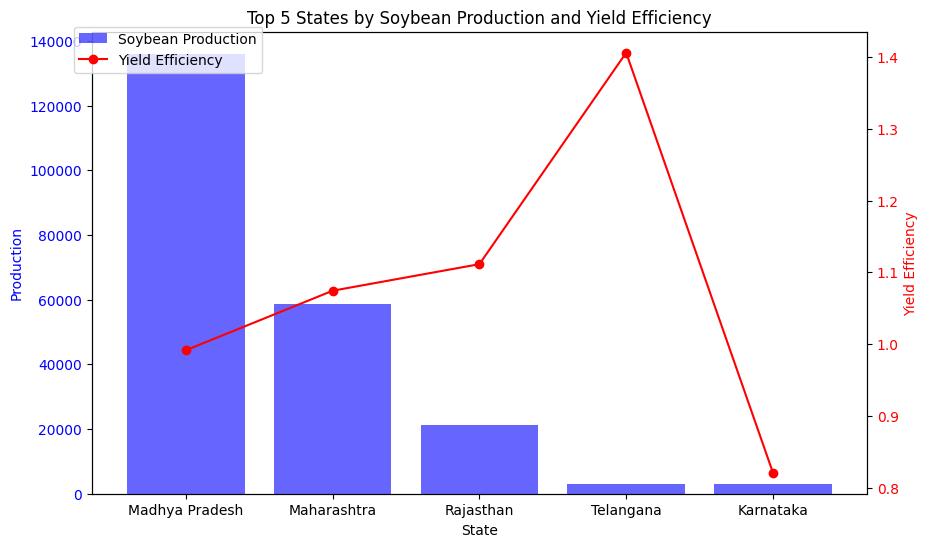

Top 5 States by Soybean Production and Yield Efficiency:
        state_name  soyabean_production  soyabean_area  soyabean_yield
10  Madhya Pradesh            136006.52      137165.32        0.991552
11     Maharashtra             58643.93       54582.37        1.074412
14       Rajasthan             21174.99       19052.48        1.111403
16       Telangana              3022.13        2149.76        1.405799
8        Karnataka              2873.98        3500.48        0.821025


In [ ]:
#12 Soybean Production by Top 5 States and Yield Efficiency
import pandas as pd
import matplotlib.pyplot as plt
data_path = r"C:/Users/karunya/Documents/Guvi projects/Agricultural Analysis Project/Other_Crops_data.csv"
top_states = (df.groupby('state_name')[['soyabean_production', 'soyabean_area']]
              .sum()
              .reset_index())

top_states['soyabean_yield'] = top_states['soyabean_production'] / top_states['soyabean_area']

top_5_states = top_states.sort_values(by='soyabean_production', ascending=False).head(5)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(top_5_states['state_name'], top_5_states['soyabean_production'], color='b', alpha=0.6, label='Soybean Production')
ax1.set_xlabel('State')
ax1.set_ylabel('Production', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.plot(top_5_states['state_name'], top_5_states['soyabean_yield'], color='r', marker='o', linestyle='-', label='Yield Efficiency')
ax2.set_ylabel('Yield Efficiency', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Top 5 States by Soybean Production and Yield Efficiency')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

print("Top 5 States by Soybean Production and Yield Efficiency:")
print(top_5_states)


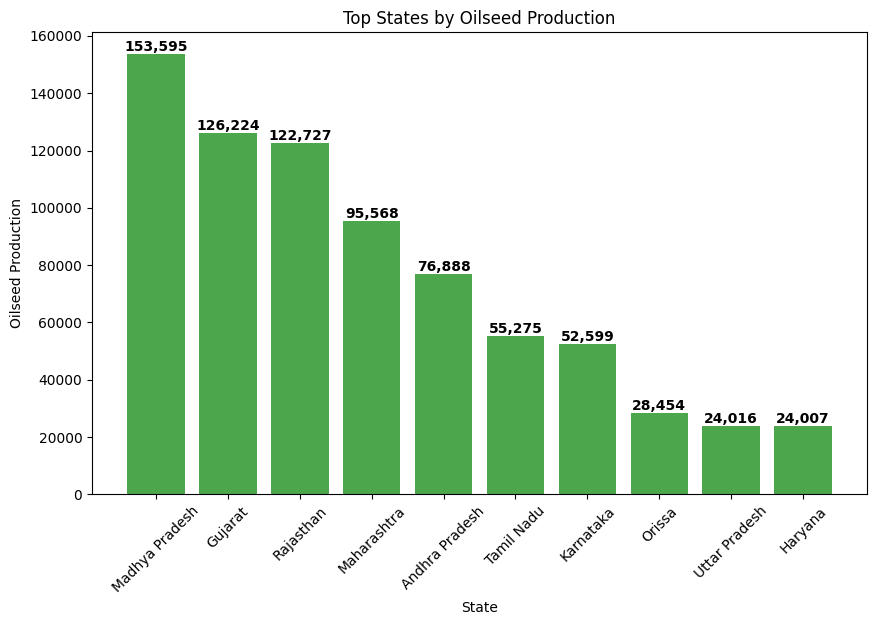

In [77]:
#13 Oilseed Production in Major States
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/karunya/Documents/Guvi projects/Agricultural Analysis Project/Other_Crops_data.csv")
top_states = (df.groupby('state_name')[['oilseeds_production']]
              .sum()
              .reset_index())
top_states = top_states.sort_values(by='oilseeds_production', ascending=False).head(10)
plt.figure(figsize=(10, 6))
bars = plt.bar(top_states['state_name'], top_states['oilseeds_production'], color='g', alpha=0.7)
plt.xlabel('State')
plt.ylabel('Oilseed Production')
plt.title('Top States by Oilseed Production')
plt.xticks(rotation=45)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():,.0f}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()



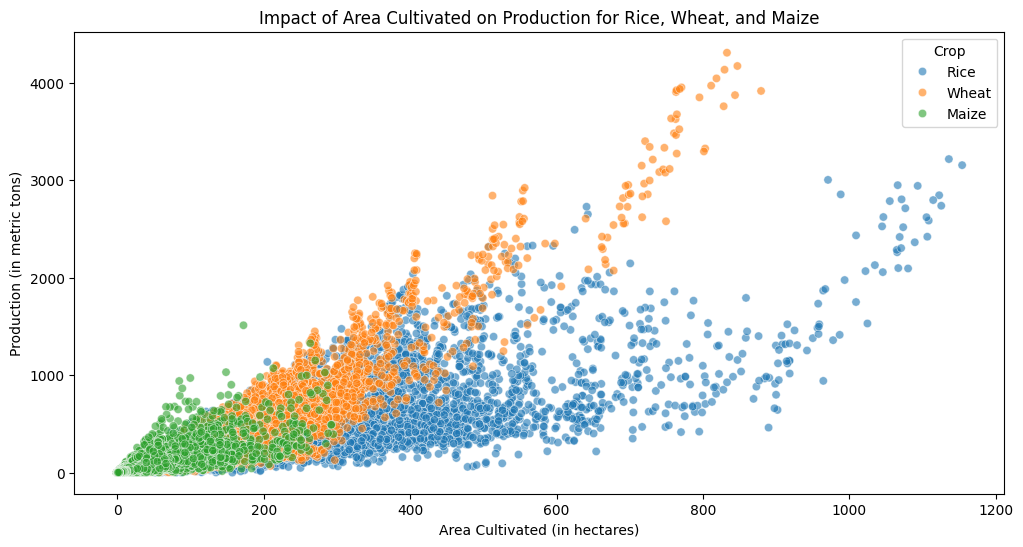

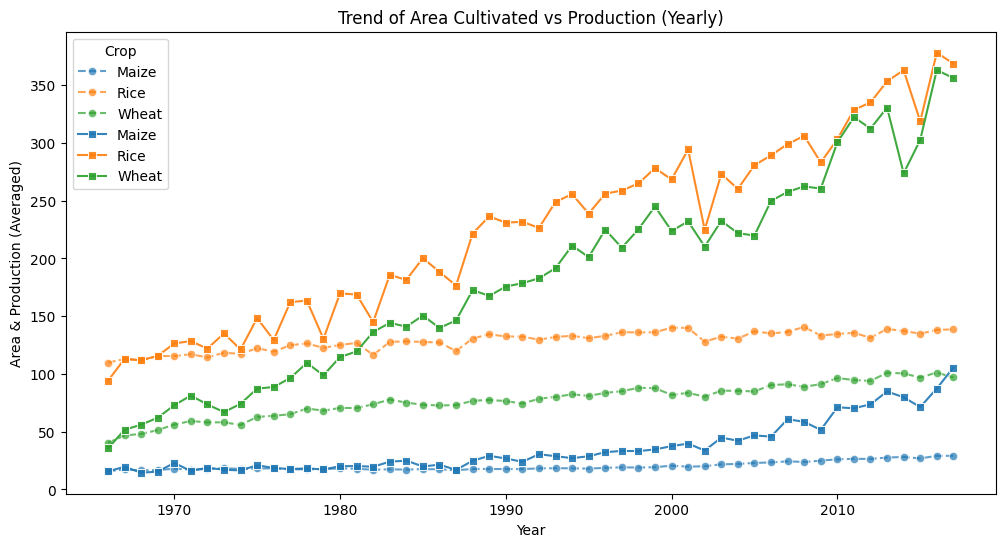

Correlation between Area and Production for Each Crop:
    crop level_1  production
0  Maize    area    0.802003
1   Rice    area    0.832515
2  Wheat    area    0.910643


In [ ]:
#14 Impact of Area Cultivated on Production (Rice, Wheat, Maize)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rice_df = pd.read_csv("C:/Users/karunya/Documents/Guvi projects/Agricultural Analysis Project/Rice_data.csv")
wheat_df = pd.read_csv("C:/Users/karunya/Documents/Guvi projects/Agricultural Analysis Project/Wheat_data.csv")
other_crops_df = pd.read_csv("C:/Users/karunya/Documents/Guvi projects/Agricultural Analysis Project/Other_Crops_data.csv")

maize_df = other_crops_df[['state_name', 'dist_name', 'year', 'maize_area', 'maize_production']]

# Merge Rice, Wheat, and Maize data
merged_df = pd.concat([
    rice_df[['state_name', 'dist_name', 'year', 'rice_area', 'rice_production']].rename(columns={'rice_area': 'area', 'rice_production': 'production'}).assign(crop='Rice'),
    wheat_df[['state_name', 'dist_name', 'year', 'wheat_area', 'wheat_production']].rename(columns={'wheat_area': 'area', 'wheat_production': 'production'}).assign(crop='Wheat'),
    maize_df[['state_name', 'dist_name', 'year', 'maize_area', 'maize_production']].rename(columns={'maize_area': 'area', 'maize_production': 'production'}).assign(crop='Maize')
])

# Convert year column to numeric and clean missing values
merged_df['year'] = pd.to_numeric(merged_df['year'], errors='coerce')
merged_df = merged_df.dropna(subset=['year'])
merged_df['year'] = merged_df['year'].astype(int)

# Compute correlation between Area and Production for each crop
correlations = merged_df.groupby("crop")[["area", "production"]].corr().iloc[0::2, -1].reset_index()

# Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x="area", y="production", hue="crop", alpha=0.6)
plt.xlabel("Area Cultivated (in hectares)")
plt.ylabel("Production (in metric tons)")
plt.title("Impact of Area Cultivated on Production for Rice, Wheat, and Maize")
plt.legend(title="Crop")
plt.show()

# Aggregate data by year and crop
aggregated_df = merged_df.groupby(["year", "crop"], as_index=False)[["area", "production"]].mean()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=aggregated_df, x="year", y="area", hue="crop", marker="o", linestyle="--", alpha=0.7)
sns.lineplot(data=aggregated_df, x="year", y="production", hue="crop", marker="s", linestyle="-", alpha=0.9)
plt.xlabel("Year")
plt.ylabel("Area & Production (Averaged)")
plt.title("Trend of Area Cultivated vs Production (Yearly)")
plt.legend(title="Crop")
plt.show()

# Display Correlation Values
print("Correlation between Area and Production for Each Crop:")
print(correlations)


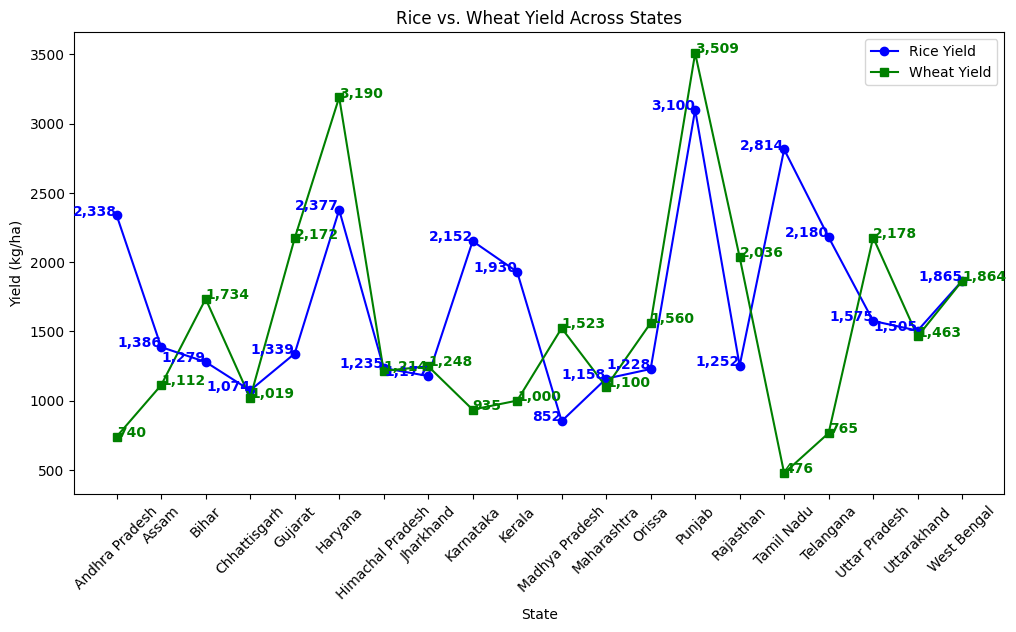

In [ ]:
#15 Rice vs. Wheat Yield Across States
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
rice_df = pd.read_csv("C:/Users/karunya/Documents/Guvi projects/Agricultural Analysis Project/Rice_data.csv")
wheat_df = pd.read_csv("C:/Users/karunya/Documents/Guvi projects/Agricultural Analysis Project/Wheat_data.csv")

rice_yield = rice_df.groupby('state_name')[['rice_yield']].mean().reset_index()
wheat_yield = wheat_df.groupby('state_name')[['wheat_yield']].mean().reset_index()
yield_comparison = pd.merge(rice_yield, wheat_yield, on='state_name', how='inner')

plt.figure(figsize=(12, 6))
plt.plot(yield_comparison['state_name'], yield_comparison['rice_yield'], marker='o', linestyle='-', color='b', label='Rice Yield')
plt.plot(yield_comparison['state_name'], yield_comparison['wheat_yield'], marker='s', linestyle='-', color='g', label='Wheat Yield')
for i, txt in enumerate(yield_comparison['rice_yield']):
    plt.text(yield_comparison['state_name'][i], txt, f'{txt:,.0f}', ha='right', fontsize=10, fontweight='bold', color='b')
for i, txt in enumerate(yield_comparison['wheat_yield']):
    plt.text(yield_comparison['state_name'][i], txt, f'{txt:,.0f}', ha='left', fontsize=10, fontweight='bold', color='g')
    
plt.xlabel('State')
plt.ylabel('Yield (kg/ha)')
plt.title('Rice vs. Wheat Yield Across States')
plt.xticks(ticks=x, labels=yield_comparison['state_name'], rotation=45)
plt.legend()
plt.show()

